In [3]:
from glob import glob
from os.path import join
import pandas as pd
import numpy as np

/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
common_path = '/Volumes/MMIS-Saraiv/Datasets/Miltiadous Dataset/features'
all_directories = glob(join(common_path, '*'))
all_directories = [directory for directory in all_directories if not directory.endswith('.csv')]

In [5]:
FEATURES_SELECTED = ['Spectral#RelativePower#C3#beta1', 'Spectral#EdgeFrequency#C3#beta3', 'Spectral#RelativePower#C3#gamma', 'Spectral#EdgeFrequency#C4#alpha1', 'Spectral#RelativePower#C4#beta3', 'Spectral#EdgeFrequency#C4#beta3', 'Spectral#EdgeFrequency#C4#gamma', 'Spectral#Flatness#Cz#theta', 'Spectral#PeakFrequency#Cz#theta', 'Spectral#EdgeFrequency#Cz#beta3', 'Spectral#EdgeFrequency#Cz#gamma', 'Spectral#PeakFrequency#Cz#gamma', 'Spectral#RelativePower#F3#beta1', 'Spectral#Diff#F4#delta', 'Spectral#RelativePower#F7#beta3', 'Spectral#EdgeFrequency#F7#beta3', 'Spectral#RelativePower#F7#gamma', 'Spectral#RelativePower#F8#beta1', 'Spectral#EdgeFrequency#F8#beta3', 'Spectral#RelativePower#Fp1#beta1', 'Spectral#EdgeFrequency#Fp1#beta3', 'Spectral#Diff#Fp2#delta', 'Spectral#RelativePower#Fp2#beta1', 'Spectral#RelativePower#Fp2#beta3', 'Spectral#Diff#Fpz#beta2', 'Spectral#Entropy#O1#delta', 'Spectral#RelativePower#O1#beta2', 'Spectral#EdgeFrequency#O1#beta2', 'Spectral#EdgeFrequency#O1#beta3', 'Spectral#RelativePower#O2#delta', 'Spectral#PeakFrequency#O2#alpha1', 'Spectral#RelativePower#O2#beta1', 'Spectral#RelativePower#O2#beta3', 'Spectral#Diff#P3#beta1', 'Spectral#RelativePower#P3#beta3', 'Spectral#RelativePower#Pz#alpha1', 'Spectral#EdgeFrequency#Pz#beta3', 'Spectral#RelativePower#T4#alpha1', 'Spectral#RelativePower#T4#beta3', 'Spectral#RelativePower#T4#gamma', 'Spectral#EdgeFrequency#T5#beta2', 'Hjorth#Complexity#T5', 'Hjorth#Complexity#P4', 'Hjorth#Complexity#F7', 'Hjorth#Complexity#T4', 'Hjorth#Complexity#F8', 'Hjorth#Complexity#T3', 'Hjorth#Mobility#P3', 'PLI#Frontal(L)-Temporal(R)#alpha1', 'PLI#Frontal(L)-Occipital(L)#alpha1', 'PLI#Frontal(R)-Temporal(R)#alpha1', 'PLI#Temporal(R)-Parietal(R)#alpha1', 'PLI#Temporal(R)-Occipital(L)#alpha1', 'PLI#Parietal(R)-Occipital(L)#alpha1', 'PLI#Occipital(L)-Occipital(R)#alpha1', 'PLI#Temporal(R)-Occipital(R)#alpha2', 'PLI#Parietal(R)-Occipital(L)#alpha2', 'COH#Frontal(L)-Frontal(R)#theta', 'COH#Frontal(L)-Occipital(L)#theta', 'COH#Frontal(L)-Occipital(R)#alpha1', 'COH#Frontal(R)-Occipital(L)#alpha1', 'COH#Parietal(R)-Occipital(L)#alpha1', 'COH#Frontal(L)-Frontal(R)#alpha2', 'COH#Frontal(L)-Occipital(R)#alpha2', 'COH#Parietal(R)-Occipital(L)#alpha2', 'COH#Parietal(R)-Occipital(R)#alpha2', 'COH#Occipital(L)-Occipital(R)#alpha2', 'COH#Frontal(L)-Occipital(L)#beta1', 'COH#Temporal(R)-Parietal(R)#beta1', 'COH#Parietal(R)-Occipital(R)#beta1', 'COH#Frontal(L)-Parietal(L)#beta2', 'COH#Frontal(R)-Occipital(L)#beta2', 'COH#Frontal(L)-Temporal(R)#beta3', 'COH#Frontal(L)-Parietal(L)#beta3', 'COH#Frontal(L)-Occipital(L)#beta3', 'COH#Frontal(L)-Occipital(R)#beta3', 'COH#Frontal(R)-Occipital(L)#beta3', 'COH#Temporal(L)-Occipital(R)#beta3', 'COH#Frontal(L)-Occipital(R)#gamma', 'COH#Frontal(R)-Occipital(R)#gamma']


In [6]:
underrepresented_targets = [4, 6, 9]

In [7]:
# Read all targets
all_targets = pd.read_csv('/Volumes/MMIS-Saraiv/Datasets/Miltiadous Dataset/participants.tsv', index_col=0, sep='\t')
# Remove "sub-" from the index and make them integers
all_targets.index = all_targets.index.str.replace('sub-', '')
all_targets.index = all_targets.index.astype(int)
all_targets

,Gender,Age,Group,MMSE
participant_id,,,,
1,F,57,A,16
2,F,78,A,22
3,M,70,A,14
4,F,67,A,20
5,M,70,A,22
...,...,...,...,...
84,F,71,F,24
85,M,64,F,26
86,M,49,F,26


In [8]:
# Read all and standardize
all_features = []
for subject_path in all_directories:
    subject = subject_path.split('/')[-1]
        
    # Get feature files
    all_files = glob(join(subject_path, '*.csv'))
    # remove all files that have "Multiple" in their name
    all_files = [file for file in all_files if 'Multiple' not in file]
    # Read them all
    all_data = [pd.read_csv(file, index_col=0) for file in all_files]
    # FIX: the spectral data has a different index
    for data in all_data:
        if 'Spectral' in data.columns[0]:
            data.index = [int(subject),]
    # Concatenate all their columns in a single DataFrame
    all_data = pd.concat(all_data, axis=1)
    # Keep only selected features
    selected_features = all_data[FEATURES_SELECTED]
    # drop nans
    selected_features = selected_features.dropna()
    
    all_features.append(selected_features)
    
all_features = pd.concat(all_features, axis=0)

# Standardize feature-wise
all_features = (all_features - all_features.mean()) / all_features.std()
all_features

,Spectral#RelativePower#C3#beta1,Spectral#EdgeFrequency#C3#beta3,Spectral#RelativePower#C3#gamma,Spectral#EdgeFrequency#C4#alpha1,Spectral#RelativePower#C4#beta3,Spectral#EdgeFrequency#C4#beta3,Spectral#EdgeFrequency#C4#gamma,Spectral#Flatness#Cz#theta,Spectral#PeakFrequency#Cz#theta,Spectral#EdgeFrequency#Cz#beta3,...,COH#Frontal(L)-Parietal(L)#beta2,COH#Frontal(R)-Occipital(L)#beta2,COH#Frontal(L)-Temporal(R)#beta3,COH#Frontal(L)-Parietal(L)#beta3,COH#Frontal(L)-Occipital(L)#beta3,COH#Frontal(L)-Occipital(R)#beta3,COH#Frontal(R)-Occipital(L)#beta3,COH#Temporal(L)-Occipital(R)#beta3,COH#Frontal(L)-Occipital(R)#gamma,COH#Frontal(R)-Occipital(R)#gamma
1,-0.813540,1.606738,0.154111,-0.857721,0.224815,2.238438,-0.563627,0.006231,-1.273021,2.837764,...,-0.068399,0.904929,-0.566126,0.054189,0.948733,0.610158,1.021883,1.518036,0.652578,0.466059
2,-0.033664,-0.317543,-0.107550,-0.755139,0.054987,-0.460885,-0.601328,-0.794429,1.604787,-1.053052,...,0.355459,0.563426,0.601700,-0.093774,0.539566,0.506951,-0.515592,0.364257,-0.011330,-1.231515
3,-1.154445,1.882797,-1.021495,-0.156794,-1.424255,1.109195,-1.062432,0.607385,0.488660,1.143272,...,-1.479721,0.226215,-0.359557,-1.332807,-0.378067,-0.107204,0.086134,-0.532508,-0.197294,0.132320
4,-1.254234,0.575753,1.226954,-1.752483,-1.211657,0.546614,1.594436,0.395285,-0.244770,-0.485500,...,-2.329057,-2.080761,-1.847199,-1.730998,-1.954706,-1.716702,-1.506039,-0.281655,-1.508070,-1.385533
5,0.264062,-0.506197,-0.006203,-0.949357,-0.670891,-1.167200,-0.220373,0.847810,-0.200759,-0.678013,...,0.908738,-0.077441,-0.331272,1.248903,-0.064808,0.764413,-0.614033,-0.657505,1.279856,0.173993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-0.874233,-0.635686,-0.799761,-0.827392,-0.747147,-0.713339,0.348795,-0.810643,0.005818,-1.090546,...,-1.126299,-0.664410,1.730351,-0.924681,0.929126,0.392679,-0.255394,-0.874653,0.301673,0.087385
85,-1.216882,-0.405034,0.499358,-1.230161,0.148454,0.570244,1.234056,0.166869,-0.348934,-1.246781,...,0.915669,-1.029708,-1.198789,1.185661,-1.218323,-0.997000,-1.044695,0.916055,-0.999309,-1.351405
86,-1.020571,1.741321,1.401623,1.103438,-0.215066,1.004956,0.780630,-0.710866,0.724228,0.148072,...,3.101518,-1.529124,-0.332736,3.896433,-1.487516,-0.717636,-1.555355,0.556569,-0.383834,-1.210385
87,0.302367,0.288400,-0.719455,0.131978,0.507717,0.007470,-0.996035,0.105071,-1.449900,0.798103,...,1.674983,0.246648,0.429508,1.992853,1.758692,1.907005,0.053669,-2.005538,1.547752,0.206318


In [9]:
# Append target column
all_features['target'] = all_targets['MMSE']
all_features

,Spectral#RelativePower#C3#beta1,Spectral#EdgeFrequency#C3#beta3,Spectral#RelativePower#C3#gamma,Spectral#EdgeFrequency#C4#alpha1,Spectral#RelativePower#C4#beta3,Spectral#EdgeFrequency#C4#beta3,Spectral#EdgeFrequency#C4#gamma,Spectral#Flatness#Cz#theta,Spectral#PeakFrequency#Cz#theta,Spectral#EdgeFrequency#Cz#beta3,...,COH#Frontal(R)-Occipital(L)#beta2,COH#Frontal(L)-Temporal(R)#beta3,COH#Frontal(L)-Parietal(L)#beta3,COH#Frontal(L)-Occipital(L)#beta3,COH#Frontal(L)-Occipital(R)#beta3,COH#Frontal(R)-Occipital(L)#beta3,COH#Temporal(L)-Occipital(R)#beta3,COH#Frontal(L)-Occipital(R)#gamma,COH#Frontal(R)-Occipital(R)#gamma,target
1,-0.813540,1.606738,0.154111,-0.857721,0.224815,2.238438,-0.563627,0.006231,-1.273021,2.837764,...,0.904929,-0.566126,0.054189,0.948733,0.610158,1.021883,1.518036,0.652578,0.466059,16
2,-0.033664,-0.317543,-0.107550,-0.755139,0.054987,-0.460885,-0.601328,-0.794429,1.604787,-1.053052,...,0.563426,0.601700,-0.093774,0.539566,0.506951,-0.515592,0.364257,-0.011330,-1.231515,22
3,-1.154445,1.882797,-1.021495,-0.156794,-1.424255,1.109195,-1.062432,0.607385,0.488660,1.143272,...,0.226215,-0.359557,-1.332807,-0.378067,-0.107204,0.086134,-0.532508,-0.197294,0.132320,14
4,-1.254234,0.575753,1.226954,-1.752483,-1.211657,0.546614,1.594436,0.395285,-0.244770,-0.485500,...,-2.080761,-1.847199,-1.730998,-1.954706,-1.716702,-1.506039,-0.281655,-1.508070,-1.385533,20
5,0.264062,-0.506197,-0.006203,-0.949357,-0.670891,-1.167200,-0.220373,0.847810,-0.200759,-0.678013,...,-0.077441,-0.331272,1.248903,-0.064808,0.764413,-0.614033,-0.657505,1.279856,0.173993,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-0.874233,-0.635686,-0.799761,-0.827392,-0.747147,-0.713339,0.348795,-0.810643,0.005818,-1.090546,...,-0.664410,1.730351,-0.924681,0.929126,0.392679,-0.255394,-0.874653,0.301673,0.087385,24
85,-1.216882,-0.405034,0.499358,-1.230161,0.148454,0.570244,1.234056,0.166869,-0.348934,-1.246781,...,-1.029708,-1.198789,1.185661,-1.218323,-0.997000,-1.044695,0.916055,-0.999309,-1.351405,26
86,-1.020571,1.741321,1.401623,1.103438,-0.215066,1.004956,0.780630,-0.710866,0.724228,0.148072,...,-1.529124,-0.332736,3.896433,-1.487516,-0.717636,-1.555355,0.556569,-0.383834,-1.210385,26
87,0.302367,0.288400,-0.719455,0.131978,0.507717,0.007470,-0.996035,0.105071,-1.449900,0.798103,...,0.246648,0.429508,1.992853,1.758692,1.907005,0.053669,-2.005538,1.547752,0.206318,24


In [14]:
# Apply SMOTE-R to balance the dataset
import smogn

# Apply SMOGN to balance the dataset
balanced_data = smogn.smoter(
    data = all_features, 
    y = 'target'
)
balanced_data_targets = balanced_data['target']
balanced_data_targets


r_index: 100%|##########| 4/4 [00:00<00:00, 220.78it/s]


1     16.0
2     22.0
3     14.0
4     20.0
6     14.0
      ... 
31    17.0
32    17.0
33     3.0
34    22.0
35    30.0
Name: target, Length: 80, dtype: float64

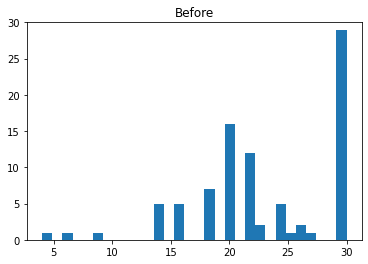

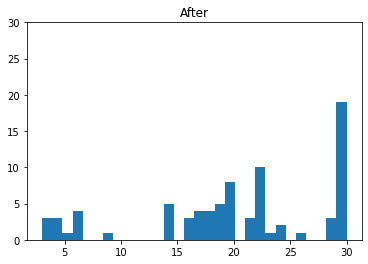

In [20]:
# Plot target distribution before and after
import matplotlib.pyplot as plt

plt.hist(all_features['target'], bins=30)
plt.title("Before")
plt.ylim((0, 30))
plt.show()

plt.hist(balanced_data_targets, bins=30)
plt.title("After")
plt.ylim((0, 30))
plt.show()